# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
! ls drive/'My Drive'/deep_learn/assignment1

collectSubmission.sh  knn.ipynb		    softmax.ipynb
cs231n		      README.md		    start_ipython_osx.sh
features.ipynb	      requirements.txt	    svm.ipynb
frameworkpython       setup_googlecloud.sh  two_layer_net.ipynb


In [0]:
import os
os.chdir('drive/My Drive/deep_learn/assignment1')

In [0]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [5]:
x_sample = 2*np.random.randn(2, 3)
x_sample

array([[-1.49472534,  1.98515105, -4.49953569],
       [ 2.24230085, -0.12489446, -1.01892143]])

In [6]:
bias_sample = np.array([1,0,-1])
bias_sample, bias_sample.shape

(array([ 1,  0, -1]), (3,))

In [7]:
first_out = x_sample + bias_sample
first_out

array([[-0.49472534,  1.98515105, -5.49953569],
       [ 3.24230085, -0.12489446, -2.01892143]])

In [8]:
np.argmax(first_out)

3

In [9]:
first_out[first_out < 0] = 0
first_out

array([[0.        , 1.98515105, 0.        ],
       [3.24230085, 0.        , 0.        ]])

In [10]:
first_out[np.arange(len(first_out)), [0, 1]]

array([0., 0.])

In [0]:
first_out.sum(axis=1)

array([0.85212871, 2.79214292])

In [0]:
-1*first_out[np.arange(len(first_out)), [0, 1]] + np.log(first_out.sum(axis=1))

array([-0.16001769,  0.94081558])

In [0]:
first_out

array([[0.        , 0.        , 0.85212871],
       [2.70614912, 0.0859938 , 0.        ]])

In [0]:
np.exp(first_out)

array([[ 1.        ,  1.        ,  2.34463259],
       [14.97151092,  1.08979957,  1.        ]])

In [0]:
first_out ** 2

array([[0.        , 0.        , 0.72612334],
       [7.32324308, 0.00739493, 0.        ]])

In [0]:
first_out

array([[0.        , 0.        , 0.85212871],
       [2.70614912, 0.0859938 , 0.        ]])

In [0]:
cc = [0, 2]
zeros_mat = np.zeros(shape=first_out.shape)
zeros_mat

array([[0., 0., 0.],
       [0., 0., 0.]])

In [0]:
zeros_mat[np.arange(len(cc)), cc] = 1
zeros_mat

array([[1., 0., 0.],
       [0., 0., 1.]])

In [0]:
np.sum(first_out)

3.6442716335281644

In [0]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [12]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [13]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [14]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 4.447656e-11
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738421e-09
W1 max relative error: 3.561318e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.01714960793873208


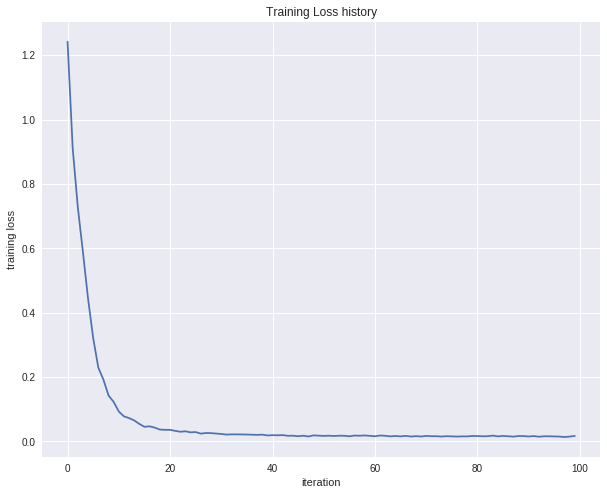

In [15]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [17]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [18]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

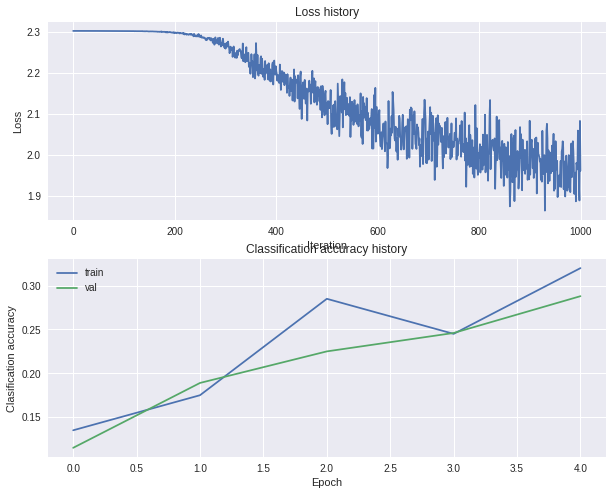

In [19]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

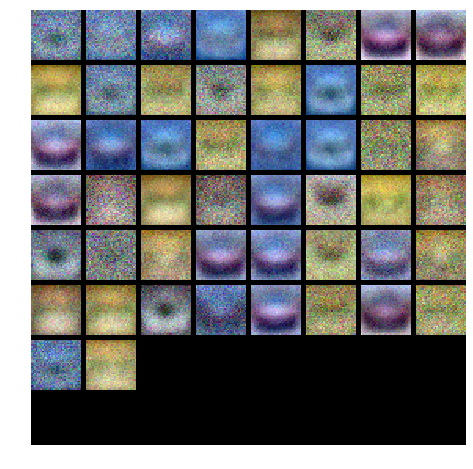

In [20]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [29]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# Your code
best_val_acc = 0
hidden_size_values = [30, 50, 70, 90]
learning_rate_values = [1e-4, 1e-3, 1e-2]
n_iter_values = [500, 1000, 1500]
reg_values = [0, 0.15, 0.25, 0.35]
for h in hidden_size_values:
  for l in learning_rate_values:
    for n_it in n_iter_values:
      for reg in reg_values:
        # Training a network for each unique h and l combination
        input_size = 32 * 32 * 3
        hidden_size = h
        num_classes = 10
        net = TwoLayerNet(input_size, hidden_size, num_classes)
        # Train the network
        stats = net.train(X_train, y_train, X_val, y_val,
                    num_iters=n_it, batch_size=200,
                    learning_rate=l, learning_rate_decay=0.95,
                    reg=reg, verbose=True)

        # Predict on the validation set
        val_acc = (net.predict(X_val) == y_val).mean()
        # Printing the results for this combination
        print('For h=%d, l=%f, num_iter=%d and reg=%f, we have val accuracy=%f'%(h, l, n_it, reg, val_acc))
        if val_acc > best_val_acc:
          best_val_acc = val_acc
          best_net = net
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 500: loss 2.302599
iteration 100 / 500: loss 2.302230
iteration 200 / 500: loss 2.300238
iteration 300 / 500: loss 2.260462
iteration 400 / 500: loss 2.229774
For h=30, l=0.000100, num_iter=500 and reg=0.000000, we have val accuracy=0.219000
iteration 0 / 500: loss 2.302723
iteration 100 / 500: loss 2.302397
iteration 200 / 500: loss 2.299030
iteration 300 / 500: loss 2.271954
iteration 400 / 500: loss 2.224294
For h=30, l=0.000100, num_iter=500 and reg=0.150000, we have val accuracy=0.211000
iteration 0 / 500: loss 2.302835
iteration 100 / 500: loss 2.302502
iteration 200 / 500: loss 2.298718
iteration 300 / 500: loss 2.270172
iteration 400 / 500: loss 2.192399
For h=30, l=0.000100, num_iter=500 and reg=0.250000, we have val accuracy=0.214000
iteration 0 / 500: loss 2.302933
iteration 100 / 500: loss 2.302691
iteration 200 / 500: loss 2.300907
iteration 300 / 500: loss 2.287207
iteration 400 / 500: loss 2.222251
For h=30, l=0.000100, num_iter=500 and reg=0.350000, we hav

/content/drive/My Drive/deep_learn/assignment1/cs231n/classifiers/neural_net.py:99: RuntimeWarning: overflow encountered in exp
  losses = -1*scores[np.arange(len(scores)), y] + np.log(np.sum(np.exp(scores), axis=1))
/content/drive/My Drive/deep_learn/assignment1/cs231n/classifiers/neural_net.py:115: RuntimeWarning: overflow encountered in exp
  dscores = np.exp(scores) / np.sum(np.exp(scores), axis=1)[:, np.newaxis]
/content/drive/My Drive/deep_learn/assignment1/cs231n/classifiers/neural_net.py:115: RuntimeWarning: invalid value encountered in true_divide
  dscores = np.exp(scores) / np.sum(np.exp(scores), axis=1)[:, np.newaxis]
/content/drive/My Drive/deep_learn/assignment1/cs231n/classifiers/neural_net.py:76: RuntimeWarning: invalid value encountered in less
  first_output[first_output < 0] = 0
/content/drive/My Drive/deep_learn/assignment1/cs231n/classifiers/neural_net.py:127: RuntimeWarning: invalid value encountered in greater
  dfo = dscores.dot(W2.T) * (fo > 0)


iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
For h=30, l=0.010000, num_iter=500 and reg=0.000000, we have val accuracy=0.087000
iteration 0 / 500: loss 2.302718
iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
For h=30, l=0.010000, num_iter=500 and reg=0.150000, we have val accuracy=0.087000
iteration 0 / 500: loss 2.302824
iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
For h=30, l=0.010000, num_iter=500 and reg=0.250000, we have val accuracy=0.087000
iteration 0 / 500: loss 2.302907
iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
For h=30, l=0.010000, num_iter=500 and reg=0.350000, we have val accuracy=0.087000
iteration 0 / 1000: loss 2.302583
iteration 100 / 1000: loss nan
iteration 200 / 1000: lo

In [30]:
print('Best validation accuracy: %f'%best_val_acc)

Best validation accuracy: 0.501000


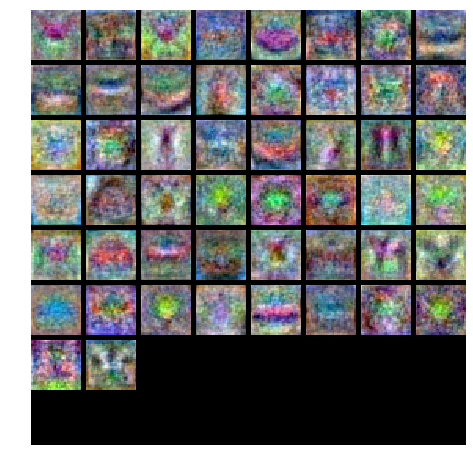

In [31]:
# visualize the weights of the best network
show_net_weights(best_net)

iteration 0 / 1500: loss 2.303556
iteration 100 / 1500: loss 1.966365
iteration 200 / 1500: loss 1.758505
iteration 300 / 1500: loss 1.718688
iteration 400 / 1500: loss 1.702119
iteration 500 / 1500: loss 1.690470
iteration 600 / 1500: loss 1.426233
iteration 700 / 1500: loss 1.616928
iteration 800 / 1500: loss 1.705008
iteration 900 / 1500: loss 1.525696
iteration 1000 / 1500: loss 1.555120
iteration 1100 / 1500: loss 1.520496
iteration 1200 / 1500: loss 1.511947
iteration 1300 / 1500: loss 1.448010
iteration 1400 / 1500: loss 1.466431


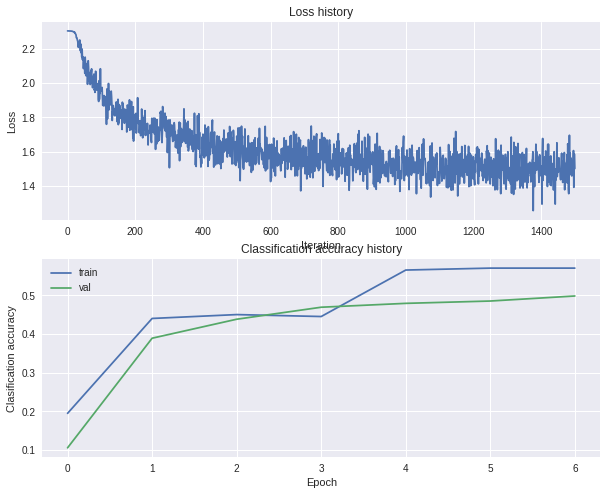

In [37]:
net_reg = TwoLayerNet(input_size, hidden_size, num_classes)
# Train the network
stats = net_reg.train(X_train, y_train, X_val, y_val,
            num_iters=1500, batch_size=200,
            learning_rate=0.001, learning_rate_decay=0.95,
            reg=0.35, verbose=True)
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

iteration 0 / 1500: loss 2.302543
iteration 100 / 1500: loss 1.934777
iteration 200 / 1500: loss 1.738071
iteration 300 / 1500: loss 1.654228
iteration 400 / 1500: loss 1.577694
iteration 500 / 1500: loss 1.585881
iteration 600 / 1500: loss 1.515953
iteration 700 / 1500: loss 1.512550
iteration 800 / 1500: loss 1.438288
iteration 900 / 1500: loss 1.468747
iteration 1000 / 1500: loss 1.430677
iteration 1100 / 1500: loss 1.357703
iteration 1200 / 1500: loss 1.481221
iteration 1300 / 1500: loss 1.388015
iteration 1400 / 1500: loss 1.327314


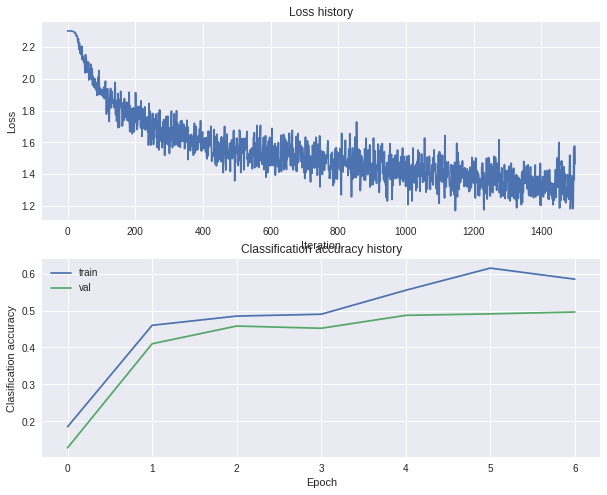

In [38]:
net = TwoLayerNet(input_size, hidden_size, num_classes)
# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1500, batch_size=200,
            learning_rate=0.001, learning_rate_decay=0.95,
            reg=0.0, verbose=True)
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [39]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.48


In [40]:
test_acc = (net_reg.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.483


In [41]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.511


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*: 1 and 3

*Your explanation:* Adding more hidden units will only make our model more complex and specific to the training set that we have hence it cannot be used on the other hand having more data in the trainset will help weed out local pattern and help generalization and regularization will also help as it diffuses the weights